In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/Lenovo/Downloads/archive (1)/swiggy.csv')

In [3]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [5]:
df.isnull().sum()

ID               0
Area             0
City             0
Restaurant       0
Price            0
Avg ratings      0
Total ratings    0
Food type        0
Address          0
Delivery time    0
dtype: int64

In [6]:
df.dtypes

ID                 int64
Area              object
City              object
Restaurant        object
Price            float64
Avg ratings      float64
Total ratings      int64
Food type         object
Address           object
Delivery time      int64
dtype: object

In [7]:
df.head()

,ID,Area,City,Restaurant,Price,Avg ratings,Total ratings,Food type,Address,Delivery time
0,211,Koramangala,Bangalore,Tandoor Hut,300.0,4.4,100,"Biryani,Chinese,North Indian,South Indian",5Th Block,59
1,221,Koramangala,Bangalore,Tunday Kababi,300.0,4.1,100,"Mughlai,Lucknowi",5Th Block,56
2,246,Jogupalya,Bangalore,Kim Lee,650.0,4.4,100,Chinese,Double Road,50
3,248,Indiranagar,Bangalore,New Punjabi Hotel,250.0,3.9,500,"North Indian,Punjabi,Tandoor,Chinese",80 Feet Road,57
4,249,Indiranagar,Bangalore,Nh8,350.0,4.0,50,"Rajasthani,Gujarati,North Indian,Snacks,Desser...",80 Feet Road,63


In [8]:
df.describe()

,ID,Price,Avg ratings,Total ratings,Delivery time
count,8680.000000,8680.000000,8680.000000,8680.000000,8680.000000
mean,244812.071429,348.444470,3.655104,156.634793,53.967051
std,158671.617188,230.940074,0.647629,391.448014,14.292335
min,211.000000,0.000000,2.000000,20.000000,20.000000
25%,72664.000000,200.000000,2.900000,50.000000,44.000000
50%,283442.000000,300.000000,3.900000,80.000000,53.000000
75%,393425.250000,400.000000,4.200000,100.000000,64.000000
max,466928.000000,2500.000000,5.000000,10000.000000,109.000000


In [10]:
# Average rating by area
avg_rating_by_area = df.groupby('Area')['Avg ratings'].mean().sort_values(ascending=False)
print("Average Rating by Area:")
print(avg_rating_by_area)

Average Rating by Area:
Area
Girish Park               4.9
Vardhman Premium Mall     4.8
Ekdalia                   4.7
Santacruz Bandra East     4.7
Wallace Garden            4.7
                         ... 
Dhanakawadi               2.9
Dapodi                    2.9
Shakurpur                 2.8
Punjab Bagh               2.7
Kausar Baugh Nibm Road    2.2
Name: Avg ratings, Length: 833, dtype: float64


In [27]:
# Most common food types
food_types = df['Food type'].str.split(',', expand=True).stack().value_counts()
print("\nMost Common Food Types:")
food_types.head(10)


Most Common Food Types:


Chinese         2588
North Indian    1921
Indian          1772
Fast Food       1550
Beverages       1524
Desserts        1436
Biryani         1079
Snacks          1013
South Indian     857
Continental      686
Name: count, dtype: int64

In [18]:
# Correlation between price and rating
correlation = df['Price'].corr(df['Avg ratings'])
print(f"\nCorrelation between Price and Average Rating: {correlation:.2f}")


Correlation between Price and Average Rating: 0.11


There is no strong correlation b/w Price and Avg_Rating

In [20]:
# Restaurants with the highest total ratings
top_rated = df.sort_values('Total ratings', ascending=False).head(5)
print("\nTop 5 Restaurants by Total Ratings:")
top_rated[['Restaurant', 'Total ratings', 'Avg ratings']]


Top 5 Restaurants by Total Ratings:


,Restaurant,Total ratings,Avg ratings
90,Grand Hotel,10000,4.1
95,Mehfil,10000,3.9
1819,4M Biryani House,10000,4.1
106,Bawarchi,10000,3.9
4069,Lucky Restaurant,10000,4.0


In [22]:
# Average delivery time by area
avg_delivery_time = df.groupby('Area')['Delivery time'].mean().sort_values()
print("\nAverage Delivery Time by Area:")
avg_delivery_time


Average Delivery Time by Area:


Area
Venkateshwara Colony          24.0
Moonlight Cream Sagrampura    26.0
Ramkote                       26.0
Rajamohallah                  27.0
Sector 4 Rohini               27.0
                              ... 
Smarpally Kestopur            90.0
Tollygunge                    90.7
Haltu                         91.0
Santoshpur                    92.0
Rabindrapally                 97.0
Name: Delivery time, Length: 833, dtype: float64

In [ ]:
# Data Visualization

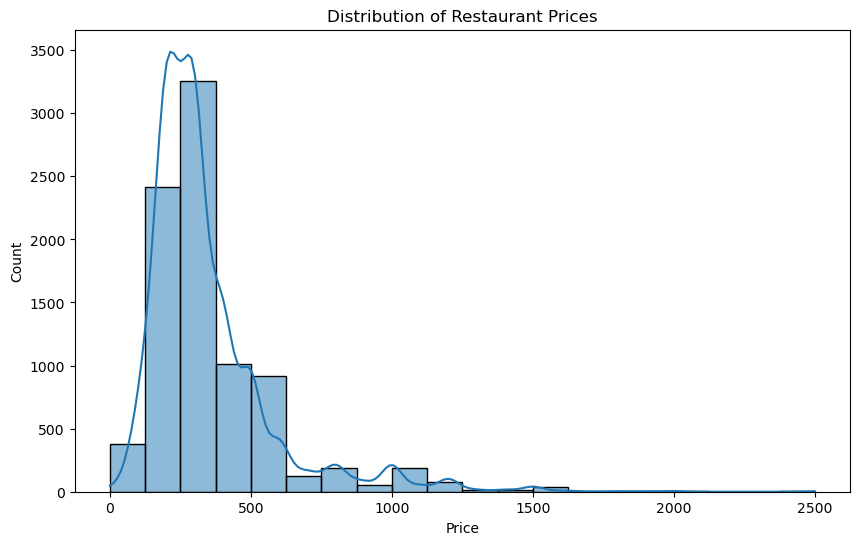

In [24]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Price'], bins=20, kde=True)
plt.title('Distribution of Restaurant Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

- The above chart Showing left Skewness
- The most common restaurant meal prices fall between price 50 and 100.
- There are very few restaurants that are very expensive or very cheap.

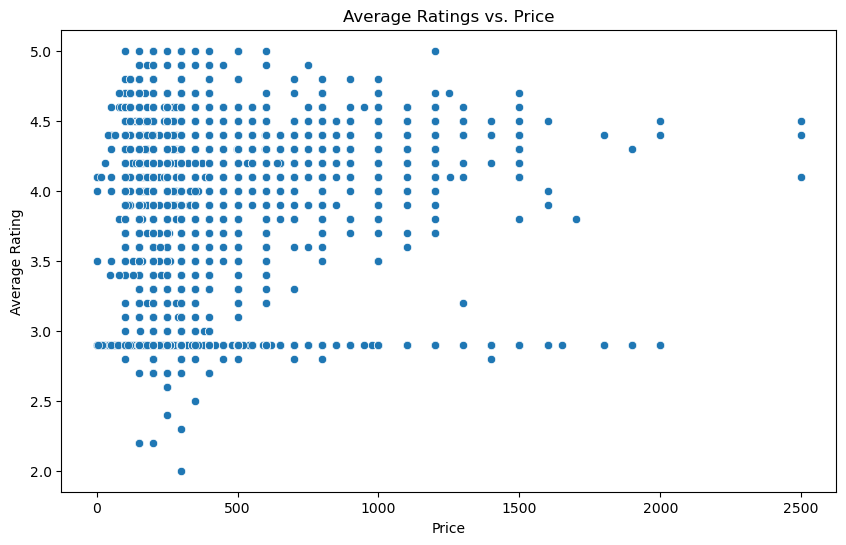

In [25]:
# Average ratings vs. Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Price', y='Avg ratings', data=df)
plt.title('Average Ratings vs. Price')
plt.xlabel('Price')
plt.ylabel('Average Rating')
plt.show()

- appears to be a weak positive correlation between average rating and price. This means that there is a slight tendency for restaurants with higher average ratings to also have higher prices. 
- There is a cluster of data points in the bottom left corner of the chart, which represent restaurants with low average ratings and low prices.

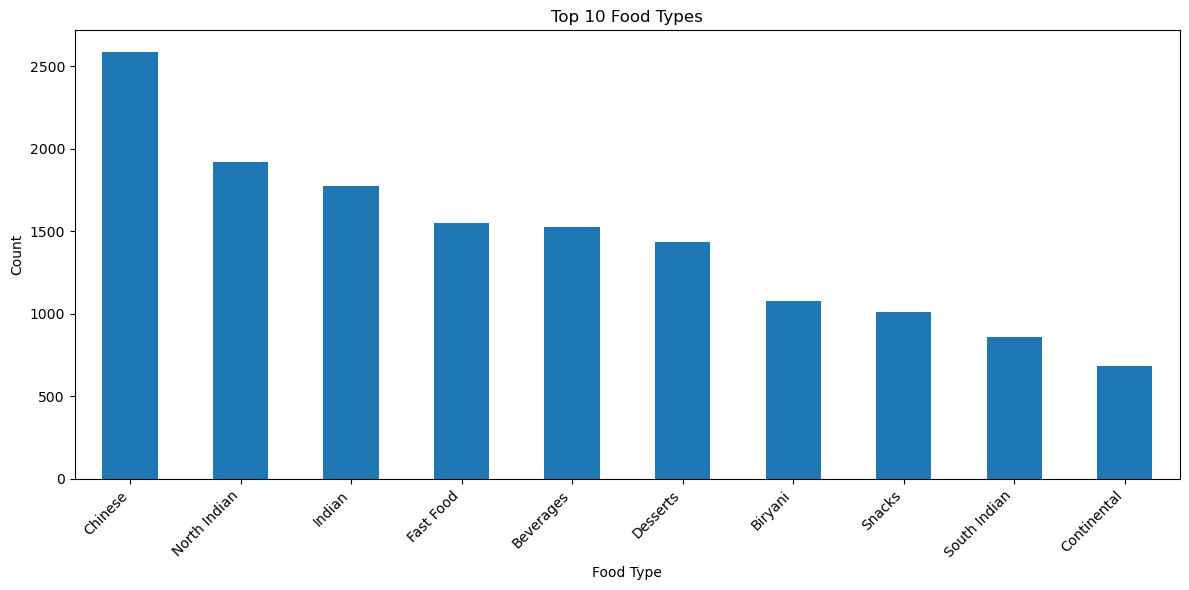

In [26]:
# Top 10 food types
plt.figure(figsize=(12, 6))
food_types.head(10).plot(kind='bar')
plt.title('Top 10 Food Types')
plt.xlabel('Food Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Chinese food is the most popular food type globally, according to the chart.
- Indian food is the second most popular food type, followed by North Indian cuisine specifically.
- Beverages and Desserts are also widely consumed around the world, according to the chart, although it’s important to note that these are quite broad categories

In [35]:
food_types.reset_index().to_csv('food_type.csv', index = False)